In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library and Preparing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv", parse_dates=['Date'])

Mari kita cek dimensi data yang kita miliki.

In [ ]:
df.shape

(145460, 23)

Dimensi data:
- 23 kolom
- 145.460 baris

Lihat lima data teratas dari df.

In [ ]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


Cek informasi mengenai dataset yang kita miliki.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Dari informasi diatas, diketahui bahwa ada banyak sekali atribut yang memiliki nilai null, untuk itu penting sekali untuk kita melakukan cleaning data terlebih dahulu.

# Cleaning Data

Sebelum pemrosesan data kita lakukan untuk keperluan Machine Learning, kita perlu membersihkan data terlebih dahulu, selain agar mendapatkan akurasi data yang bagus kita juga jadi lebih mudah nantinya saat mengolah data tersebut.

**Periksa apakah ada nilai null atau tidak.**

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Wah banyak sekali, untuk ini mari lakukan **dropna**.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Berhasil! Nilai null sudah teratasi.

**Periksa apakah ada nilai terduplikat atau tidak.**

In [ ]:
df.duplicated().sum()

0

Tidak ada nilai terduplikat. 

Yeay! Sekarang data kita sudah benar-benar bersih, selanjutnya kita perlu merapihkan data karena masih perlu diperiksa kembali apakah data-data ini sudah berisikan tipe data dan kolom-kolom yang memang kita perlukan atau tidak.

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
# simpan hasil cleaning data
df.to_csv('weatherUAS_bersih.csv',index=False)

# Exploratory Data Analysis

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


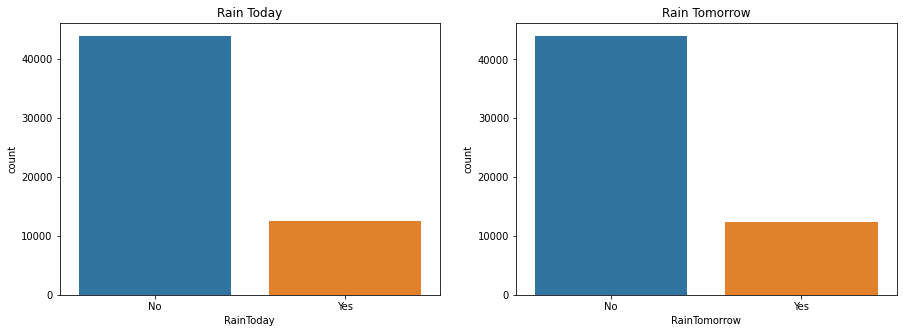

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot (x='RainToday', data=df)
plt.title('Rain Today')

plt.subplot(1,2,2)
sns.countplot (x='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.show()

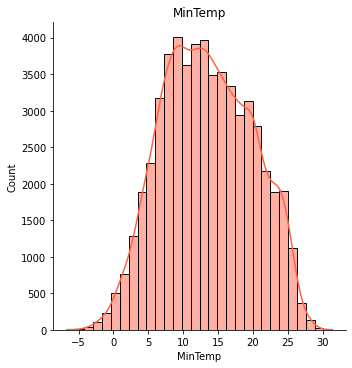

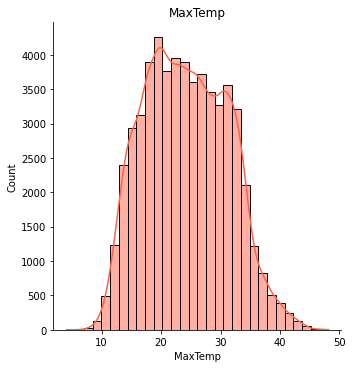

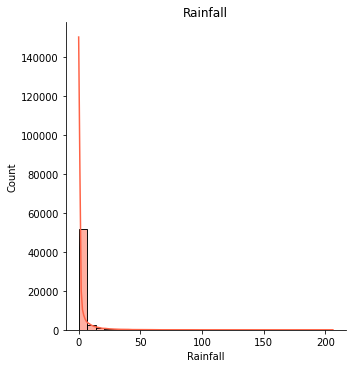

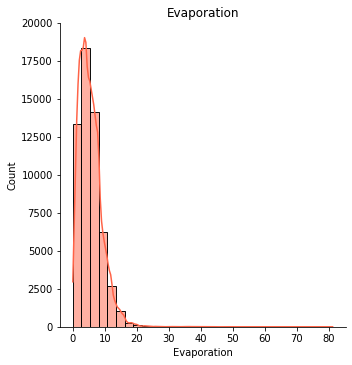

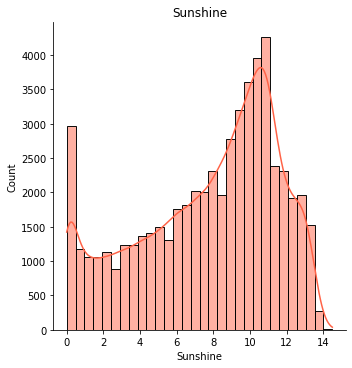

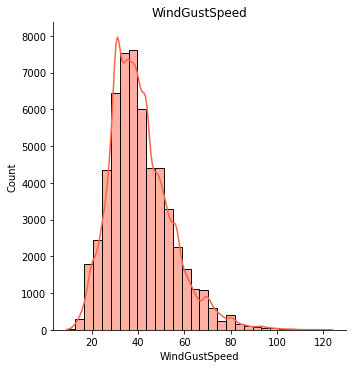

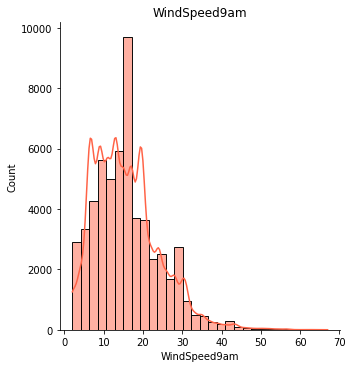

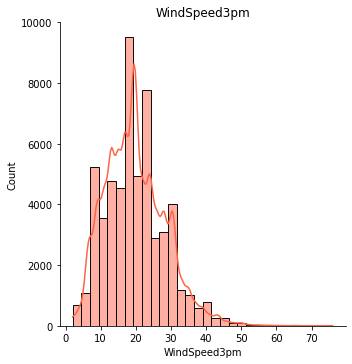

In [ ]:
sns.displot(df['MinTemp'], kde=True, color='tomato', bins=30)
plt.title('MinTemp');

sns.displot(df['MaxTemp'], kde=True, color='tomato', bins=30)
plt.title('MaxTemp');

sns.displot(df['Rainfall'], kde=True, color='tomato', bins=30)
plt.title('Rainfall');

sns.displot(df['Evaporation'], kde=True, color='tomato', bins=30)
plt.title('Evaporation');

sns.displot(df['Sunshine'], kde=True, color='tomato', bins=30)
plt.title('Sunshine');

sns.displot(df['WindGustSpeed'], kde=True, color='tomato', bins=30)
plt.title('WindGustSpeed');

sns.displot(df['WindSpeed9am'], kde=True, color='tomato', bins=30)
plt.title('WindSpeed9am');

sns.displot(df['WindSpeed3pm'], kde=True, color='tomato', bins=30)
plt.title('WindSpeed3pm');

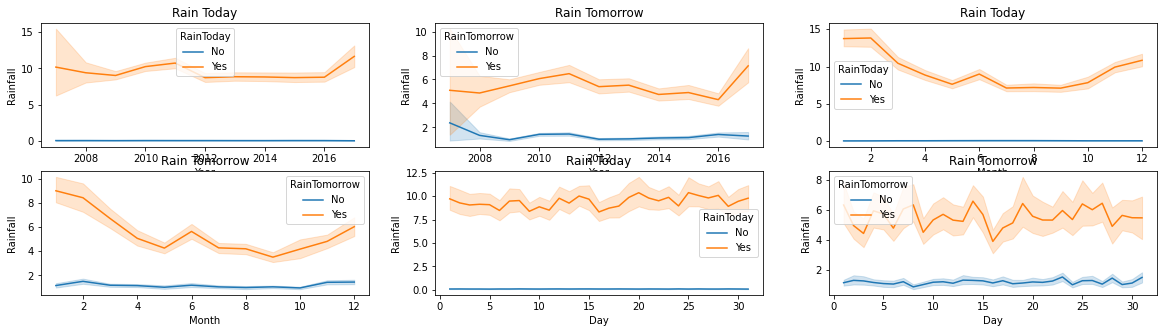

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(2,3,1)
sns.lineplot (x='Year', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today')

plt.subplot(2,3,2)
sns.lineplot (x='Year', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.subplot(2,3,3)
sns.lineplot (x='Month', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today')

plt.subplot(2,3,4)
sns.lineplot (x='Month', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.subplot(2,3,5)
sns.lineplot (x='Day', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today')

plt.subplot(2,3,6)
sns.lineplot (x='Day', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.show()

# Preprocessing Data

In [ ]:
# df.drop(columns=['Year', 'Month', 'Day'], inplace=True)
df.drop(columns=['Date'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'])
df['WindGustDir'] = label.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label.fit_transform(df['WindDir3pm'])
df['RainToday'] = label.fit_transform(df['RainToday'])
df['RainTomorrow'] = label.fit_transform(df['RainTomorrow'])

df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0


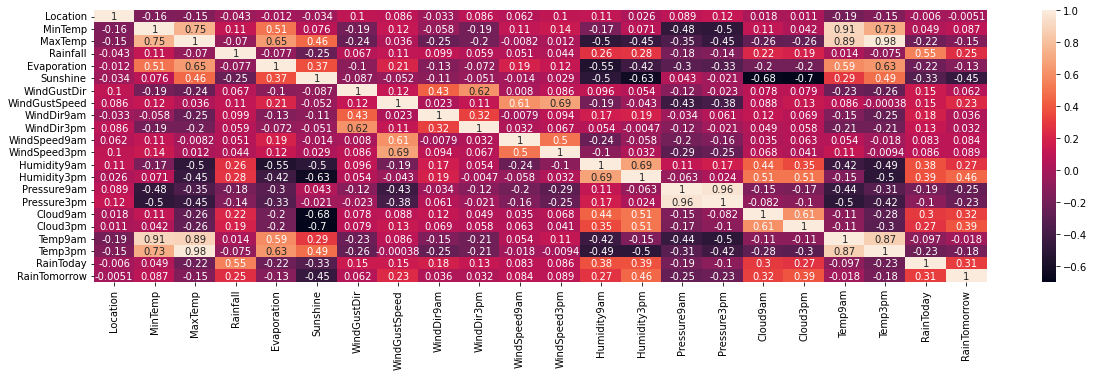

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
final_df = pd.DataFrame(df[['RainTomorrow', 'RainToday', 'Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm', 
            'Rainfall']])

In [ ]:
# simpan hasil LabelEncoder
final_df.to_csv('datax.csv',index=False)

In [ ]:
featurescalling = [i for i in df.columns if i != 'RainTomorrow']

In [ ]:
scaler = StandardScaler()
df[featurescalling] = scaler.fit_transform(df[featurescalling])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,-1.534807,-1.181844,0.691208,1.575298,-0.303702,1.757691,1.214537,0.733362,0.534126,-1.313714,...,-2.477924,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,-0.532445,0
6050,-1.533634,-1.181844,0.769131,0.671504,-0.303702,2.515216,1.400800,0.107353,-0.290764,0.617292,...,-1.937767,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,-0.532445,0
6052,-1.531290,-1.181844,0.924976,1.919600,-0.303702,1.433038,0.762183,-0.518656,0.384146,-0.455489,...,-1.289578,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,-0.532445,0
6053,-1.530117,-1.181844,1.314588,2.034368,-0.303702,1.595364,1.187928,1.359371,-0.740704,1.475517,...,-1.559657,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,-0.532445,0
6054,-1.528945,-1.181844,1.673032,2.407362,-0.303702,1.541255,0.176784,1.359371,-0.440744,-0.026377,...,-2.531940,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,-0.532445,0


In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Modelling: Logistic Regression

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = final_df.drop(['RainTomorrow'], axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = final_df['RainTomorrow']
print(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[[-0.53244519 -0.80142825  0.25441126 -2.4779243  -1.81226109 -0.30370205]
 [-0.53244519 -1.15893659 -1.25660337 -1.93776698 -2.05982431 -0.30370205]
 [-0.53244519 -1.15893659  0.63216492 -1.2895782  -1.36664729 -0.30370205]
 ...
 [-0.53244519 -1.51644493 -1.63435703 -1.07351528 -1.31713464 -0.30370205]
 [-0.53244519 -1.15893659 -1.25660337 -0.20926357  0.41580793 -0.30370205]
 [-0.53244519  0.6286051   0.25441126  0.38490948 -0.87152084 -0.30370205]]


In [ ]:
logres = LogisticRegression()
logres.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0,
                   class_weight=None,
                   dual=False,
                   fit_intercept=True,
                   intercept_scaling=1,
                   l1_ratio=None,
                   max_iter=100,
                   multi_class='auto',
                   n_jobs=None,
                   penalty='l2',
                   random_state=None,
                   solver='lbfgs',
                   tol=0.0001,
                   verbose=0,
                   warm_start=False)

LogisticRegression()

In [ ]:
lr_pred = logres.predict(x_test)
print("Test score:", logres.score(x_test, y_test))
print("Train score:", logres.score(x_train, y_train))

Test score: 0.8311768876285005
Train score: 0.8385767458348103


In [ ]:
lracc = accuracy_score(y_test, lr_pred)
lrcm = confusion_matrix(y_test, lr_pred)
lrclass = classification_report(y_test, lr_pred)

print("Accuracy Score: ", lracc)
print(lrcm)
print(lrclass)

Accuracy Score:  0.8311768876285005
[[8255  460]
 [1445 1124]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8715
           1       0.71      0.44      0.54      2569

    accuracy                           0.83     11284
   macro avg       0.78      0.69      0.72     11284
weighted avg       0.82      0.83      0.82     11284



In [ ]:
lrf1 = round(f1_score(y_test, lr_pred, average='weighted'), 3)
lr_precision = round(precision_score(y_test, lr_pred), 3)
lr_recall = round(recall_score(y_test, lr_pred), 3)

print("F1 Score: ", lrf1)
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)

F1 Score:  0.816
Precision:  0.71
Recall:  0.438


In [ ]:
logres.predict_proba(x_test)

array([[0.83995293, 0.16004707],
       [0.97500604, 0.02499396],
       [0.65974347, 0.34025653],
       ...,
       [0.92138496, 0.07861504],
       [0.15886714, 0.84113286],
       [0.74753085, 0.25246915]])

In [ ]:
logres.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

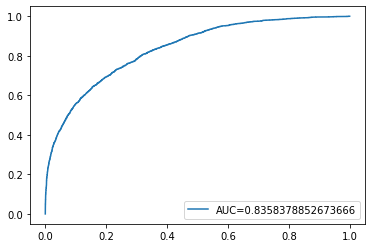

In [ ]:
y_pred_proba = logres.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

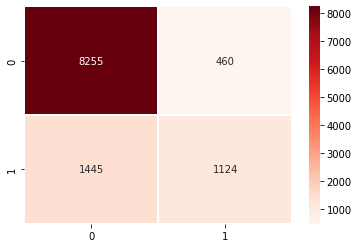

In [ ]:
sns.heatmap(lrcm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

In [ ]:
# Saving Model with Pickle
pickle.dump(logres, open('logres_besok.pkl', 'wb'))

# Modelling: Support Vector Machine (SVM)

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = final_df.drop(['RainTomorrow'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = final_df['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
svm.SVC(C=1.0,
    break_ties=False,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape='ovr',
    degree=3,
    gamma='scale',
    kernel='rbf',
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False)

SVC()

In [ ]:
pred_svm = svm_model.predict(x_test)
print("Test score:", svm_model.score(x_test, y_test))
print("Train score:", svm_model.score(x_train, y_train))

Test score: 0.8430521091811415
Train score: 0.8388647642679901


In [ ]:
svmacc = accuracy_score(y_test, pred_svm)
svmcm = confusion_matrix(y_test, pred_svm)
svmclass = classification_report(y_test, pred_svm)

print("Accuracy Score: ", svmacc)
print(svmcm)
print(svmclass)

Accuracy Score:  0.8430521091811415
[[8597  287]
 [1484  916]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8884
           1       0.76      0.38      0.51      2400

    accuracy                           0.84     11284
   macro avg       0.81      0.67      0.71     11284
weighted avg       0.83      0.84      0.82     11284



In [ ]:
svmf1 = round(f1_score(y_test, pred_svm, average='weighted'), 3)
svm_precision = round(precision_score(y_test, pred_svm), 3)
svm_recall = round(recall_score(y_test, pred_svm), 3)

print("F1 Score: ", svmf1)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)

F1 Score:  0.822
Precision:  0.761
Recall:  0.382


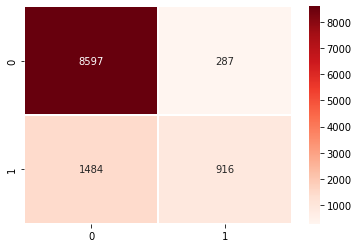

In [ ]:
sns.heatmap(svmcm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

In [ ]:
# Saving Model with Pickle
pickle.dump(svm_model, open('svm_besok.pkl', 'wb'))

# Modelling: K-Nearest Neighbor Classifier (KNN)

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = df.drop(['RainTomorrow'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = df['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_knn = knn_model.predict(x_test)
print("Test score:", knn_model.score(x_test, y_test))
print("Train score:", knn_model.score(x_train, y_train))

Test score: 0.8444700460829493
Train score: 0.8885147110953563


In [ ]:
knnacc = accuracy_score(y_test, pred_knn)
knncm = confusion_matrix(y_test, pred_knn)
knnclass = classification_report(y_test, pred_knn)

print("Accuracy Score: ", knnacc)
print(knncm)
print(knnclass)

Accuracy Score:  0.8444700460829493
[[8208  600]
 [1155 1321]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8808
           1       0.69      0.53      0.60      2476

    accuracy                           0.84     11284
   macro avg       0.78      0.73      0.75     11284
weighted avg       0.84      0.84      0.84     11284



In [ ]:
knnf1 = round(f1_score(y_test, pred_knn, average='weighted'), 3)
knn_precision = round(precision_score(y_test, pred_knn), 3)
knn_recall = round(recall_score(y_test, pred_knn), 3)

print("F1 Score: ", knnf1)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)

F1 Score:  0.837
Precision:  0.688
Recall:  0.534


**Laporan Klasifikasi:**

Laporan klasifikasi menampilkan skor Precision , Recall , F1 dan Support  untuk model tersebut.

**Skor presisi** berarti tingkat ketepatan prediksi yang dibuat oleh model. Presisi untuk **Tidak Hujan adalah 0,87** dan untuk **Hujan adalah 0,78** .

Ingat adalah jumlah hingga model dapat memprediksi hasilnya. **Recall** untuk **Tidak Hujan adalah 0,96** dan untuk **Terjadi Hujan adalah 0,50** .

**Skor F1** dan Dukungan adalah jumlah data yang diuji untuk prediksi. Dalam kumpulan data Prediksi Cuaca, data yang diuji untuk **Tidak Hujan adalah 8753** dan untuk **Hujan adalah 2531** .

**Confusion matrix:**

Confusion matrix adalah tabel yang menggambarkan kinerja model prediksi. Confusion matrix berisi nilai aktual dan nilai prediksi. kita dapat menggunakan nilai-nilai ini untuk menghitung skor akurasi model.

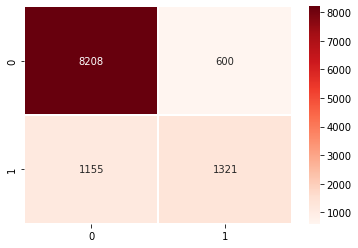

In [ ]:
sns.heatmap(knncm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

**Skor Akurasi:**

Skor akurasi adalah persentase akurasi prediksi yang dibuat oleh model. Untuk model kami, **skor akurasinya adalah 0.85** yang cukup akurat, tetapi semakin tinggi skor akurasi semakin efisien model prediksi Anda. Dengan mengikuti langkah-langkah yang dibahas di atas, kami telah memperkirakan kemungkinan besok Hujan/Tidak Hujan menggunakan dataset Prediksi Cuaca.

In [ ]:
# Saving Model with Pickle
pickle.dump(knn_model, open('knn_besok.pkl', 'wb'))

# Modelling: Gaussian Naive Bayes

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = df.drop(['RainTomorrow'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = df['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [ ]:
gauspred = gaussian.predict(x_test)
print("Test score:", gaussian.score(x_test, y_test))
print("Train score:", gaussian.score(x_train, y_train))

Test score: 0.7960829493087558
Train score: 0.8014888337468983


In [ ]:
gausacc = accuracy_score(y_test, gauspred)
gauscm = confusion_matrix(y_test, gauspred)
gausclass = classification_report(y_test, gauspred)

print("Accuracy Score: ", gausacc)
print(gauscm)
print(gausclass)

Accuracy Score:  0.7960829493087558
[[7258 1500]
 [ 801 1725]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      8758
           1       0.53      0.68      0.60      2526

    accuracy                           0.80     11284
   macro avg       0.72      0.76      0.73     11284
weighted avg       0.82      0.80      0.80     11284



In [ ]:
gausf1 = round(f1_score(y_test, gauspred, average='weighted'), 3)
gaus_precision = round(precision_score(y_test, gauspred), 3)
gaus_recall = round(recall_score(y_test, gauspred), 3)

print("F1 Score: ", gausf1)
print("Precision: ", gaus_precision)
print("Recall: ", gaus_recall)

F1 Score:  0.804
Precision:  0.535
Recall:  0.683


**Laporan Klasifikasi:**

Laporan klasifikasi menampilkan skor Precision , Recall , F1 dan Support  untuk model tersebut.

**Skor presisi** berarti tingkat ketepatan prediksi yang dibuat oleh model. Presisi untuk **Tidak Hujan adalah 0,87** dan untuk **Hujan adalah 0,78** .

Ingat adalah jumlah hingga model dapat memprediksi hasilnya. **Recall** untuk **Tidak Hujan adalah 0,96** dan untuk **Terjadi Hujan adalah 0,50** .

**Skor F1** dan Dukungan adalah jumlah data yang diuji untuk prediksi. Dalam kumpulan data Prediksi Cuaca, data yang diuji untuk **Tidak Hujan adalah 8753** dan untuk **Hujan adalah 2531** .

**Confusion matrix:**

Confusion matrix adalah tabel yang menggambarkan kinerja model prediksi. Confusion matrix berisi nilai aktual dan nilai prediksi. kita dapat menggunakan nilai-nilai ini untuk menghitung skor akurasi model.

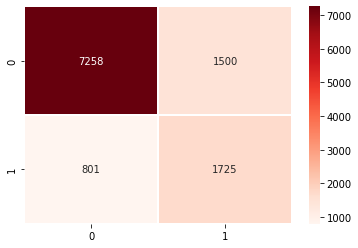

In [ ]:
sns.heatmap(gauscm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

**Skor Akurasi:**

Skor akurasi adalah persentase akurasi prediksi yang dibuat oleh model. Untuk model kami, **skor akurasinya adalah 0.85** yang cukup akurat, tetapi semakin tinggi skor akurasi semakin efisien model prediksi Anda. Dengan mengikuti langkah-langkah yang dibahas di atas, kami telah memperkirakan kemungkinan besok Hujan/Tidak Hujan menggunakan dataset Prediksi Cuaca.

In [ ]:
# Saving Model with Pickle
pickle.dump(gaussian, open('gaus_besok.pkl', 'wb'))

# Modelling: Random Forest Classifier

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = df.drop(['RainTomorrow'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = df['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rf = rf_model.predict(x_test)
print("Test score:", rf_model.score(x_test, y_test))
print("Train score:", rf_model.score(x_train, y_train))

Test score: 0.8643211627082594
Train score: 0.9999778447359092


In [ ]:
rfacc = accuracy_score(y_test, pred_rf)
rfcm = confusion_matrix(y_test, pred_rf)
rfclass = classification_report(y_test, pred_rf)

print("Accuracy Score: ", rfacc)
print(rfcm)
print(rfclass)

Accuracy Score:  0.8643211627082594
[[8429  394]
 [1137 1324]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8823
           1       0.77      0.54      0.63      2461

    accuracy                           0.86     11284
   macro avg       0.83      0.75      0.78     11284
weighted avg       0.86      0.86      0.86     11284



In [ ]:
rff1 = round(f1_score(y_test, pred_rf, average='weighted'), 3)
rf_precision = round(precision_score(y_test, pred_rf), 3)
rf_recall = round(recall_score(y_test, pred_rf), 3)

print("F1 Score: ", rff1)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)

F1 Score:  0.855
Precision:  0.771
Recall:  0.538


**Laporan Klasifikasi:**

Laporan klasifikasi menampilkan skor Precision , Recall , F1 dan Support  untuk model tersebut.

**Skor presisi** berarti tingkat ketepatan prediksi yang dibuat oleh model. Presisi untuk **Tidak Hujan adalah 0,87** dan untuk **Hujan adalah 0,78** .

Ingat adalah jumlah hingga model dapat memprediksi hasilnya. **Recall** untuk **Tidak Hujan adalah 0,96** dan untuk **Terjadi Hujan adalah 0,50** .

**Skor F1** dan Dukungan adalah jumlah data yang diuji untuk prediksi. Dalam kumpulan data Prediksi Cuaca, data yang diuji untuk **Tidak Hujan adalah 8753** dan untuk **Hujan adalah 2531** .

**Confusion matrix:**

Confusion matrix adalah tabel yang menggambarkan kinerja model prediksi. Confusion matrix berisi nilai aktual dan nilai prediksi. kita dapat menggunakan nilai-nilai ini untuk menghitung skor akurasi model.

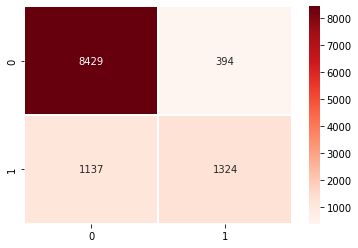

In [ ]:
sns.heatmap(rfcm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

**Skor Akurasi:**

Skor akurasi adalah persentase akurasi prediksi yang dibuat oleh model. Untuk model kami, **skor akurasinya adalah 0.85** yang cukup akurat, tetapi semakin tinggi skor akurasi semakin efisien model prediksi Anda. Dengan mengikuti langkah-langkah yang dibahas di atas, kami telah memperkirakan kemungkinan besok Hujan/Tidak Hujan menggunakan dataset Prediksi Cuaca.

In [ ]:
# Saving Model with Pickle
pickle.dump(rf_model, open('rf_besok.pkl', 'wb'))

# Modelling: Decision Tree Classifier

## Prediksi Apakah besok hujan?

In [ ]:
scaler = StandardScaler()
datax = df.drop(['RainTomorrow'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = df['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dcpred = decision.predict(x_test)
print("Test score:", decision.score(x_test, y_test))
print("Train score:", decision.score(x_train, y_train))

Test score: 0.7892591279688054
Train score: 1.0


In [ ]:
dcacc = accuracy_score(y_test, dcpred)
dccm = confusion_matrix(y_test, dcpred)
dcclass = classification_report(y_test, dcpred)

print("Accuracy Score: ", dcacc)
print(dccm)
print(dcclass)

Accuracy Score:  0.7892591279688054
[[7555 1234]
 [1144 1351]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      8789
           1       0.52      0.54      0.53      2495

    accuracy                           0.79     11284
   macro avg       0.70      0.70      0.70     11284
weighted avg       0.79      0.79      0.79     11284



In [ ]:
dcf1 = round(f1_score(y_test, dcpred, average='weighted'), 3)
dc_precision = round(precision_score(y_test, dcpred), 3)
dc_recall = round(recall_score(y_test, dcpred), 3)

print("F1 Score: ", dcf1)
print("Precision: ", dc_precision)
print("Recall: ", dc_recall)

F1 Score:  0.791
Precision:  0.523
Recall:  0.541


**Laporan Klasifikasi:**

Laporan klasifikasi menampilkan skor Precision , Recall , F1 dan Support  untuk model tersebut.

**Skor presisi** berarti tingkat ketepatan prediksi yang dibuat oleh model. Presisi untuk **Tidak Hujan adalah 0,87** dan untuk **Hujan adalah 0,78** .

Ingat adalah jumlah hingga model dapat memprediksi hasilnya. **Recall** untuk **Tidak Hujan adalah 0,96** dan untuk **Terjadi Hujan adalah 0,50** .

**Skor F1** dan Dukungan adalah jumlah data yang diuji untuk prediksi. Dalam kumpulan data Prediksi Cuaca, data yang diuji untuk **Tidak Hujan adalah 8753** dan untuk **Hujan adalah 2531** .

**Confusion matrix:**

Confusion matrix adalah tabel yang menggambarkan kinerja model prediksi. Confusion matrix berisi nilai aktual dan nilai prediksi. kita dapat menggunakan nilai-nilai ini untuk menghitung skor akurasi model.

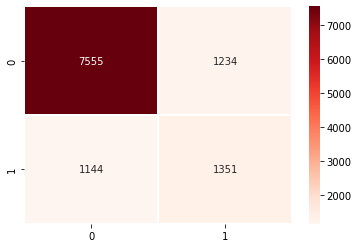

In [ ]:
sns.heatmap(dccm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

**Skor Akurasi:**

Skor akurasi adalah persentase akurasi prediksi yang dibuat oleh model. Untuk model kami, **skor akurasinya adalah 0.85** yang cukup akurat, tetapi semakin tinggi skor akurasi semakin efisien model prediksi Anda. Dengan mengikuti langkah-langkah yang dibahas di atas, kami telah memperkirakan kemungkinan besok Hujan/Tidak Hujan menggunakan dataset Prediksi Cuaca.

In [ ]:
# Saving Model with Pickle
pickle.dump(decision, open('dc_besok.pkl', 'wb'))

# Final Result

In [ ]:
finalresult = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K - Nearest Neighbors', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'],
    'Score': [lracc, svmacc, knnacc, gausacc, rfacc, dcacc], 
    'F1Score': [lrf1, svmf1, knnf1, gausf1, rff1, dcf1], 
    'Precision': [lr_precision, svm_precision, knn_precision, gaus_precision, rf_precision, dc_precision], 
    'Recall': [lr_recall, svm_recall, knn_recall, gaus_recall, rf_recall, dc_recall]})
finalresult.sort_values(by='Score', ascending=False)

,Model,Score,F1Score,Precision,Recall
4,Random Forest,0.864321,0.855,0.771,0.538
1,Support Vector Machine,0.861131,0.851,0.781,0.525
0,Logistic Regression,0.853598,0.845,0.729,0.537
2,K - Nearest Neighbors,0.844470,0.837,0.688,0.534
3,Gaussian Naive Bayes,0.796083,0.804,0.535,0.683
5,Decision Tree,0.789259,0.791,0.523,0.541


Dari tabel diatas dapat dilihat bahwa Random Forest memiliki score paling tinggi daripada lainnya

Text(0.5, 1.0, 'Grafik Perbandingan Setiap Model')

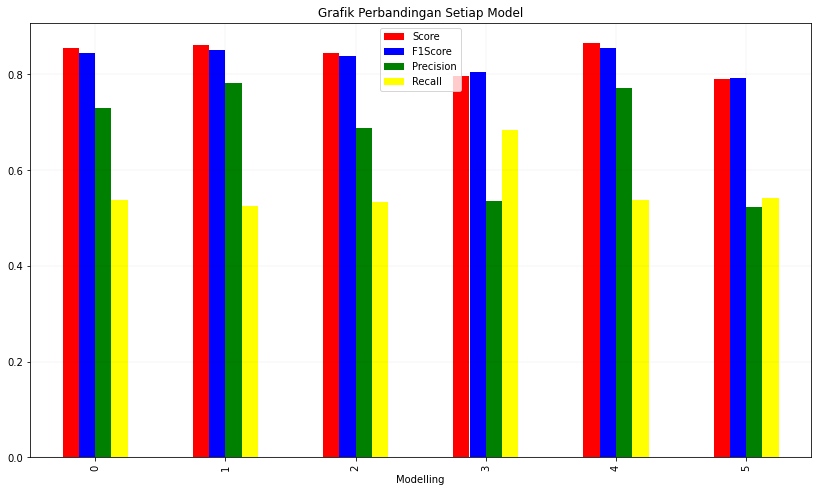

In [ ]:
finalresult.plot(kind='bar', figsize=(14,8), color=['red','blue','green',"yellow"])
plt.grid(color='black', linestyle='-', linewidth=0.2, alpha=0.2)
plt.xlabel('Modelling')
plt.title('Grafik Perbandingan Setiap Model')

# Model Inference

In [ ]:
X_new = {'Location':[0,1,15,34,48], 
         'RainToday':[0,1,0,1,1],
         'WindDir3am':[11,1.25,2.3,20.4,4.52], 
         'WindGustDir':[12.45,20.5,11.4,45.3,30.2], 
         'WindDir9am':[10.85,4.5,12,15.5,20.3], 
         'MinTemp':[13.4,7.4,12.9,9.2,17.5], 
         'MaxTemp':[25,25.2,25.1,28,32], 
         'Rainfall':[0,0.2,0.1,1,0.6], 
         'Evaporation':[1,2,3,4,5], 
         'Sunshine':[1,2,3,4,5], 
         'WindGustSpeed':[21,32,33,44,45], 
         'WindSpeed9am':[11,20,23,14,25], 
         'WindSpeed3pm':[9,22,23,24,25], 
         'Humidity9am':[81,72,43,64,55], 
         'Humidity3pm':[21,22,23,24,25], 
         'Pressure9am':[1000.1,1000.2,1003,1004,1005.5], 
         'Pressure3pm':[1012.1,1001.2,1003.3,1014,1005], 
         'Cloud9am':[1,2,3,4,5], 
         'Cloud3pm':[1,2,3,4,5], 
         'Temp9am':[21,23,31,44,15], 
         'Temp3pm':[24,23.6,27,24,21]}
X_new = pd.DataFrame(X_new)
X_new.head()

,Location,RainToday,WindDir3am,WindGustDir,WindDir9am,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0,0,11.00,12.45,10.85,13.4,25.0,0.0,1,1,...,11,9,81,21,1000.1,1012.1,1,1,21,24.0
1,1,1,1.25,20.50,4.50,7.4,25.2,0.2,2,2,...,20,22,72,22,1000.2,1001.2,2,2,23,23.6
2,15,0,2.30,11.40,12.00,12.9,25.1,0.1,3,3,...,23,23,43,23,1003.0,1003.3,3,3,31,27.0
3,34,1,20.40,45.30,15.50,9.2,28.0,1.0,4,4,...,14,24,64,24,1004.0,1014.0,4,4,44,24.0
4,48,1,4.52,30.20,20.30,17.5,32.0,0.6,5,5,...,25,25,55,25,1005.5,1005.0,5,5,15,21.0


In [ ]:
scal = StandardScaler()
X_new = scal.fit_transform(X_new)

In [ ]:
y_pred = logres.predict(X_new)
print('Prediksi Hujan: ')
print(y_pred)

ValueError: ignored